In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 


In [4]:
df=pd.read_csv("Zomato data .csv")

In [5]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [7]:
df.shape

(148, 7)

In [8]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [9]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [10]:
def handle(value):
    value=str(value).strip('/')
    value=value[0]
    
    return float(value)

df['rate']=df['rate'].apply(handle)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.0    775   
1         Spice Elephant          Yes         No   4.0    787   
2        San Churro Cafe          Yes         No   3.0    918   
3  Addhuri Udupi Bhojana           No         No   3.0     88   
4          Grand Village           No         No   3.0    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


## Type of Restaurant

Text(0.5, 0, 'Type of Restaurant')

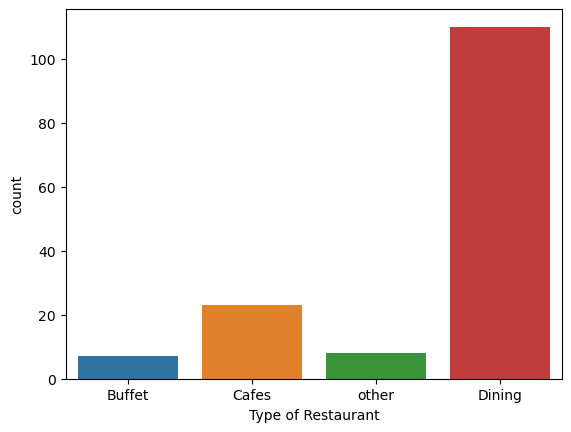

In [11]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Restaurant')

# Qsn: What type of restaurant do the majority of customers order from? 

### Conclusion: 
Majority of the restaurant falls in **dining category** 

Text(0, 0.5, 'Votes')

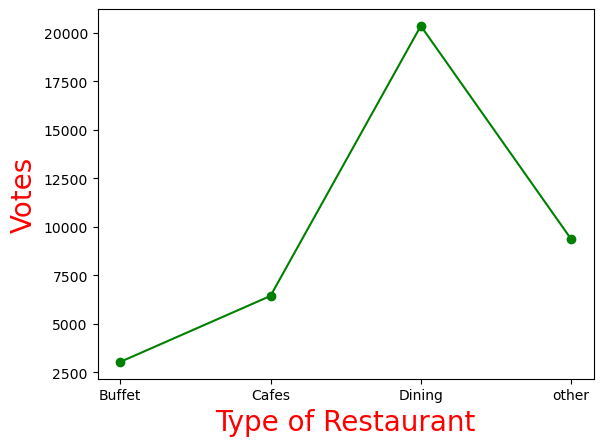

In [12]:
group_data= df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':group_data})
plt.plot(result,c="green",marker="o")

plt.xlabel("Type of Restaurant",c="red", size=20)
plt.ylabel("Votes", c="red" , size=20)

## How many votes has each type of restaurant received from customers?

### Conclusion:
**Dining Restaurants** has received maximum votes

In [13]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.0,775,800,Buffet
1,Spice Elephant,Yes,No,4.0,787,800,Buffet
2,San Churro Cafe,Yes,No,3.0,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.0,88,300,Buffet
4,Grand Village,No,No,3.0,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.0,0,100,Dining
144,New Indraprasta,No,No,3.0,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


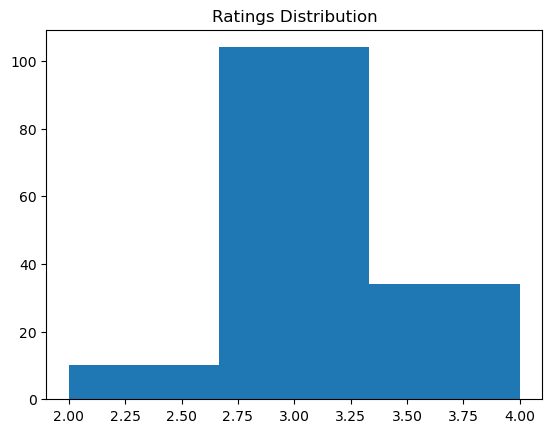

In [18]:
plt.hist(df['rate'],bins=3)
plt.title("Ratings Distribution")
plt.show()

# Qsn : what are the ratings that the majority of restaurants have received?

## Conclusion:
Majority restaurants received ratings from **2.75 to 3.30**

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

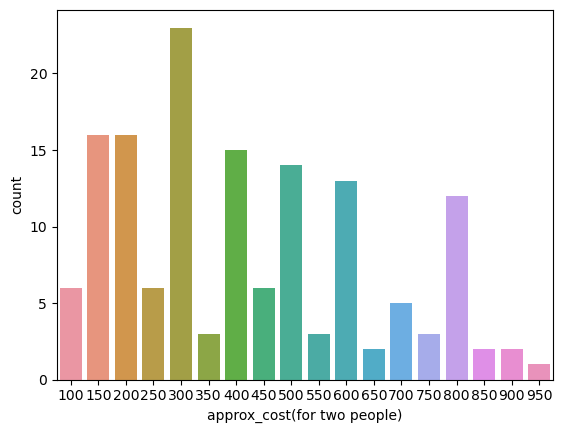

In [19]:
two_people=df['approx_cost(for two people)']
sns.countplot(x=two_people)

# Qsn: Zomato has observed that most couples order most of their food online .What is their average spending on each other ?


## Conclusion:
the Majority of couples prefer restaurants with an approximate cost of **300 rs**.

<Axes: xlabel='online_order', ylabel='rate'>

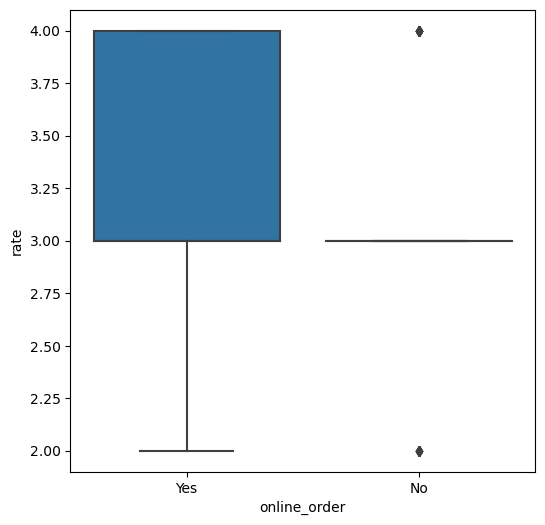

In [20]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate',data=df)

# Which mode (online or offline) has received the maximum rating?

## Conclusion:
**Offline order received lower rating in comparison to online order** 

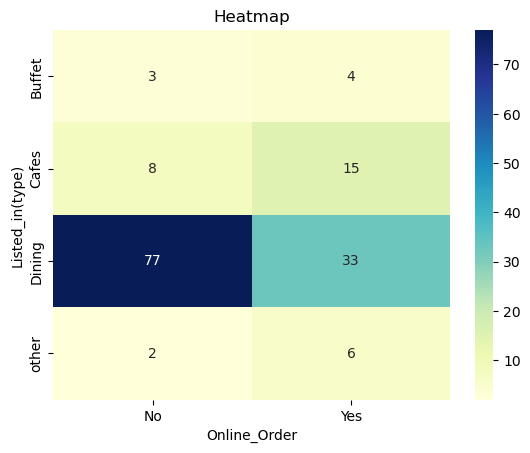

In [23]:
pivot_table = df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title("Heatmap")
plt.xlabel("Online_Order")
plt.ylabel("Listed_in(type)")
plt.show()

## Qsn:Which type of restaurant received more offline orders, so that zomato can provide customers with some good offers?

## Conclcusion:
Dining restaurants primarily accept offline orders , whereas cafes primarily receive online orders . 
This suggests that clients preferred orders in person at restaurants , but prefer ordering at cafes.